In [1]:
import numpy as np
import utils as ut
import pandas as pd 
from sklearn import tree as skt
from sklearn import preprocessing as skp 
from sklearn import decomposition as skd
from sklearn import metrics as skm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data/feature_reduction.csv')
df.head()

,DeviceID,Hour,PeerCount,DataPerConn,DNSConn,NTPConn,HTTPData,DevType
0,0,0,4,39.32,2,3,29.04,Video
1,1,0,4,37.65,2,2,28.59,Video
2,2,0,4,32.11,1,2,24.82,Video
3,3,0,11,34.11,3,1,24.32,Computer
4,4,0,3,2.98,1,1,2.35,Thermostat


In [3]:
# Let us scale the data 
X_columns = ['PeerCount','DataPerConn', 'DNSConn',	'NTPConn',	'HTTPData']
Y_column = 'DevType'
scaler = skp.MinMaxScaler()
X = df[X_columns].to_numpy()
Y = df[Y_column].tolist()

In [4]:
# We can define different types of PCA reduction to pass through the pipeline 
# Let us see what the impact of passing the pipeline is for various PCA components 
# Originally, the number of components is 5

def get_pipeline(num_pca_components):
    tasks = list()
    tasks.append(('Scale', skp.MinMaxScaler()))
    tasks.append(('PCA', skd.PCA(n_components=num_pca_components)))
    tasks.append(('Classifier', skt.DecisionTreeClassifier()))
    return Pipeline(tasks) 


def check_classifier_cv(pipe, X, Y, cv):
    score = cross_val_score(pipe, X, Y, cv=cv)
    return np.mean(score)

def test_pipeline(pipe, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
    pipe.fit(X_train,Y_train)
    predictions = pipe.predict(X_test)
    return skm.accuracy_score(Y_test, predictions)
    
    
for i in [1, 2, 3, 4, 5]:
    pipe = get_pipeline(i)
    print(f'Num PC Components: {i}, Accuracy: {check_classifier_cv(pipe,X,Y,5):.2f}')  
    

Num PC Components: 1, Accuracy: 0.84
Num PC Components: 2, Accuracy: 0.94
Num PC Components: 3, Accuracy: 0.94
Num PC Components: 4, Accuracy: 0.94
Num PC Components: 5, Accuracy: 0.90


In [5]:
# We can see which component gets the best performance. 
# Note, we need to run the experiments a few times to get the best average statistics 
# Let us compare it to a pipeline which does not use any PCA component 

In [6]:
# Since there are two many dimensions, we can't easily visualize it. 
# PCA allows us a way to project the information to 2 dimensions, so we can visualize it better
# Let us map the X_features to a 2-dimensional PCA space 

def get_basic_pipeline():
    tasks = list()
    tasks.append(('Scale', skp.MinMaxScaler()))
    tasks.append(('Classifier', skt.DecisionTreeClassifier()))
    return Pipeline(tasks) 

bpipe = get_basic_pipeline()
print(f' Accuracy: {check_classifier_cv(bpipe,X,Y,5):.2f}')  

 Accuracy: 0.96


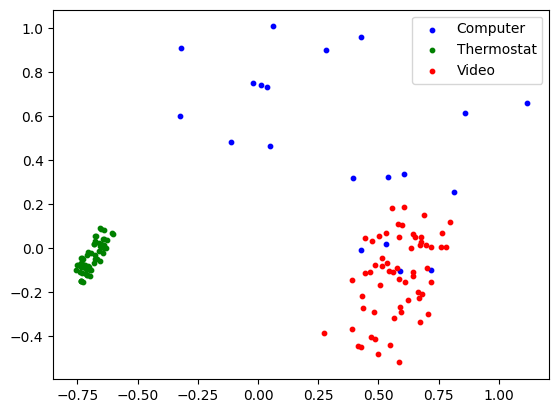

In [7]:
# Another benefit of a PCA decomposiiton is that we can visualize the data 
# The visualization is done by projecting the data into a 2-dimensional space. 

def plot_pca_view(X,Y):
    scaler = skp.MinMaxScaler()
    scaled_X = scaler.fit_transform(X)
    pca = skd.PCA(n_components=2)
    pca_X = pca.fit_transform(scaled_X)
    pca_df = pd.DataFrame({'PCA1':pca_X[:,0], 'PCA2': pca_X[:,1], 'Y':Y})
    ut.plot_df(pca_df,'PCA1', 'PCA2', 'Y')

plot_pca_view(X,Y)